In [2]:
import numpy as np
import pandas as pd

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("../data/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Exploration


CLIENTNUM：Client number - Unique identifier for the customer holding the account  

Attrition_Flag：Flag indicative of account closure in next 6 months (between Jan to Jun 2013)

Customer_Age：Age of the account holder

Gender：Gender of the account holder

Dependent_count：Number of people financially dependent on the account holder

Education_Level：Educational qualification of account holder (ex - high school, college grad etc.)

Marital_Status：Marital status of account holder (Single, Married, Divorced, Unknown)

Income_Category：Annual income category of the account holder

Card_Category：Card type depicting the variants of the cards by value proposition (Blue, Silver and Platinum)

Months_on_book：Number of months since the account holder opened an an account with the lender

Total_Relationship_Count：Total number of products held by the customer. Total number of relationships the account holder has with the bank (example - retail bank, mortgage, wealth management etc.)

Months_Inactive_12_mon：Total number of months inactive in last 12 months

Contacts_Count_12_mon：Number of Contacts in the last 12 months. No. of times the account holder called to the call center in the past 12 months

Credit_Limit：Credit limit

Total_Revolving_Bal：Total amount as revolving balance

Avg_Open_To_Buy：Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1：Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt：Total Transaction Amount (Last 12 months)

Total_Trans_Ct：Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1：Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio：Average Card Utilization Ratio

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactivity

In [4]:
df.shape

(10127, 23)

In [5]:
columns = df.columns
columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [7]:
# count of diffrent data types
pd.value_counts(df.dtypes)

/tmp/ipykernel_1006/3993878514.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df.dtypes)


int64      10
float64     7
object      6
Name: count, dtype: int64

In [8]:
# output basic statistical details like percentile, mean, std etc. of the data frame
df.describe().style.background_gradient(cmap="ocean_r")

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,739177606.333663,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,36903783.450231,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,708082083.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,713036770.500000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,717926358.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,773143533.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,828343083.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


## Handling missing value

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
total

# percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
# percent

CLIENTNUM                                                                                                                             0
Contacts_Count_12_mon                                                                                                                 0
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    0
Avg_Utilization_Ratio                                                                                                                 0
Total_Ct_Chng_Q4_Q1                                                                                                                   0
Total_Trans_Ct                                                                                                                        0
Total_Trans_Amt                                                                                                                       0
Total_Amt_Chng_Q4_Q1                            

#### According to the results, which show a descending sequence of missing values, there are no missing values in the dataset.

## Delete irrelevant variables

In [10]:
no_use = np.arange(21, df.shape[1])
no_use

array([21, 22])

In [11]:
# drop the columns not useful for analysis
df.drop(df.columns[no_use], axis=1, inplace=True)

In [12]:
# drop the CLIENTNUM column as it is just an identifier
df.drop("CLIENTNUM", axis=1, inplace=True)

In [13]:
# check the columns of the dataframe
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [14]:
df.describe().style.background_gradient(cmap="ocean_r")

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Exploration Data Analysis

In [15]:
# extracting the numerical columns for analysis
df_frequency = df[["Customer_Age", "Total_Trans_Ct", "Total_Trans_Amt",
                   "Months_Inactive_12_mon", "Credit_Limit", "Attrition_Flag"]]
df_frequency.head()

,Customer_Age,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon,Credit_Limit,Attrition_Flag
0,45,42,1144,1,12691.0,Existing Customer
1,49,33,1291,1,8256.0,Existing Customer
2,51,20,1887,1,3418.0,Existing Customer
3,40,20,1171,4,3313.0,Existing Customer
4,40,28,816,1,4716.0,Existing Customer


In [16]:
# explore the target variable
df["Attrition_Flag"].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

#### The result shows that there are 8500 existing customers and 1627 customers who have left. 

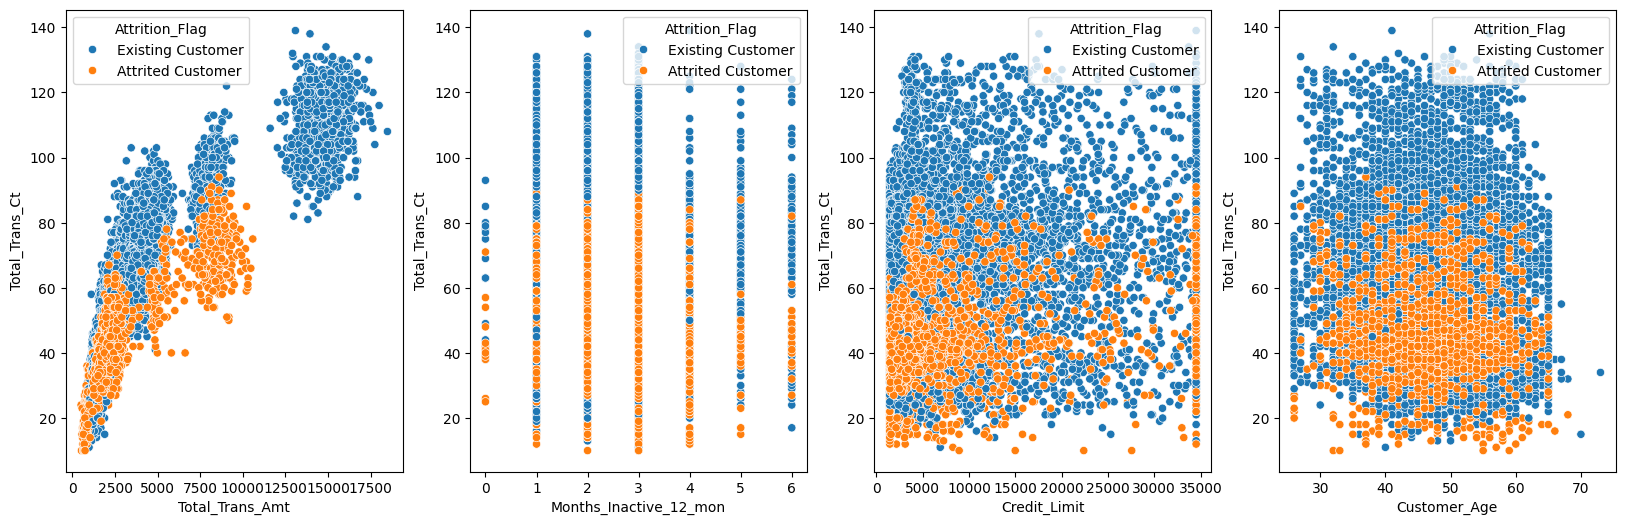

In [17]:
# define the size of the figure
fig, ax = plt.subplots(ncols=4, figsize=(20, 6))

sns.scatterplot(data=df_frequency,
                x="Total_Trans_Amt",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[0])

sns.scatterplot(data=df_frequency,
                x="Months_Inactive_12_mon",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[1])

sns.scatterplot(data=df_frequency,
                x="Credit_Limit",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[2])

sns.scatterplot(data=df_frequency,
                x="Customer_Age",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[3])

plt.show()

In [ ]:
# using plotly express for interactive plots
for col in ["Customer_Age", "Total_Trans_Amt", "Months_Inactive_12_mon", "Credit_Limit"]:
    fig = px.scatter(df_frequency,
                     x=col,
                     y="Total_Trans_Ct",
                     color="Attrition_Flag")
    fig.show()

In [ ]:
# the following is implemented based on go.Scatter
df_frequency_copy = df_frequency.copy()
df_frequency_copy["Attrition_Flag_number"] = df_frequency_copy["Attrition_Flag"].apply(
    lambda x: 1 if x == "Existing Customer" else 2)

four_columns = ["Total_Trans_Amt", "Months_Inactive_12_mon",
                "Credit_Limit", "Customer_Age"]

fig = make_subplots(rows=1,
                    cols=4,
                    start_cell="top-left",
                    shared_yaxes=True,
                    subplot_titles=four_columns  # subplot titles
                    )

for i, v in enumerate(four_columns):
    r = i // 4 + 1
    c = (i + 1) % 4

    if c == 0:
        fig.add_trace(go.Scatter(x=df_frequency_copy[v].tolist(),
                                 y=df_frequency_copy["Total_Trans_Ct"].tolist(
        ),
            mode='markers',
            marker=dict(color=df_frequency_copy.Attrition_Flag_number)),
            row=r, col=4)

    else:
        fig.add_trace(go.Scatter(x=df_frequency_copy[v].tolist(),
                                 y=df_frequency_copy["Total_Trans_Ct"].tolist(
        ),
            mode='markers',
            marker=dict(color=df_frequency_copy.Attrition_Flag_number)),

            row=r, col=c)

fig.update_layout(width=1000, height=450, showlegend=False)

fig.show()

#### Blue: Existing customers; Yellow: Lost customers

#### Key findings:

#### - Figure 1: Customers who spend more annually are less likely to churn.
#### - Figure 2: Lack of interaction for 2–3 months increases the likelihood of churn.
#### - Figure 3: Higher credit limits are associated with customer retention. Most lost customers used their credit cards fewer than 100 times.
#### - Figure 4: Age distribution does not significantly impact customer attrition.